In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#**PCA**

Today we going to learn and code **Principal Component analysis**

This method helps to process a data reduction. It done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order.


##**PCA Algoritm**

1) Center the data

$$
\overline{X} = X - \mu
$$

Where $\mu$ is the vector of means for every feature

2) Compute the covarience matrix. Let $X_{centered}$ be the size of $n \times m$.The covarience matrix thus is

$$
C = \frac{1}{n-1} \overline{X}^{\top} \overline{X}
$$


3) Compute eigen Decomposition of $C$

$$
C = V^{-1} Λ V
$$

Where $V$ is eigen vectors, and $\Lambda$ is diagonal of eigenvalues

4) Sort eigenvalues from max to min and sort eigen vectors the same way

5) take only $k$ eigen vectors  corresponding to the $k$ max eigen values

$$
W = V[:, :k]
$$

6) Get the new vector representations

$$
T = \overline{X} W
$$

In [ ]:
# you will need internet connection for this block
csv_url = "https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/nutrition.csv"
dataset = pd.read_csv(csv_url)

# there are no (0) saturated fats in vegetables, that's why we replace N/A values with 0
dataset = dataset.fillna(0)

classes_list = dataset["Food Type"][1:].values
names = dataset["Food and Serving"][1:].values
dimensions = dataset.columns[1:]

print("Names:", *names[:5], "...", sep=" | ")
print()
print("Classes:", *set(classes_list), sep=" | ")
print()
print("Dimensions:", *dimensions[:5], "...", sep=" | ")

dataset.head()

Names: | Asparagus, 5 spears (93 g/3.3 oz) | Bell Pepper, 1 medium (148 g/5.3 oz) | Broccoli, 1 medium stalk (148 g/5.3 oz) | Carrot, 1 carrot, 7" long, 1 1/4" diameter (78 g/2.8 oz) | Cauliflower, 1/6 medium head (99 g/3.5 oz) | ...

Classes: | Fruits Serving Size (gram weight/ounce weight) | Seafood, Serving Size (84 g/3 oz) | Vegetables, Serving Size (gram weight/ ounce weight)

Dimensions: | Calories | Calories from Fat | Total Fat 1 | Total Fat 2 | Sodium 1 | ...


,Food and Serving,Calories,Calories from Fat,Total Fat 1,Total Fat 2,Sodium 1,Sodium 2,Potassium 1,Potassium 2,Total Carbo-hydrate 1,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat 2,Chole-sterol 1,Chole-sterol 2,Food Type
0,0,0.0,0.0,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),0
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."


In [ ]:
classes = list(set(classes_list))
colors = ["red", "green", "blue", "black", "magenta"]
class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = colors[i % len(colors)]

print(class_colors)
color_list = [class_colors[a] for a in classes_list]

{'Fruits Serving Size (gram weight/ounce weight)': 'red', 'Seafood, Serving Size (84 g/3 oz)': 'green', 'Vegetables, Serving Size (gram weight/ ounce weight)': 'blue'}


In [ ]:
def show_points_2d(X, Y, xaxis, yaxis):
    global names, classes_list, class_colors
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    classes = set()
    for x, y, name, label in zip(X, Y, names, classes_list):
        if not label in classes:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label], label=label)
            classes.add(label)
        else:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label])
        plt.text(x, y, name)
    plt.legend()
    plt.axvline(0)
    plt.axhline(0)
    plt.show()

def show_points_3d(X, Y, Z):
    global color_list
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    for x, y, z, color in zip(X, Y, Z, color_list):
        ax.scatter([x], [y], [z], marker='o', color=color)
    plt.show()

def show_matrix(A, xaxis, yaxis):
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.imshow(A)
    plt.show()

In [ ]:
A = dataset.to_numpy()[1:,1:-1].astype('float64')

In [ ]:
A.shape

(61, 22)

Raw matrix values, columns are objects (61, 22)


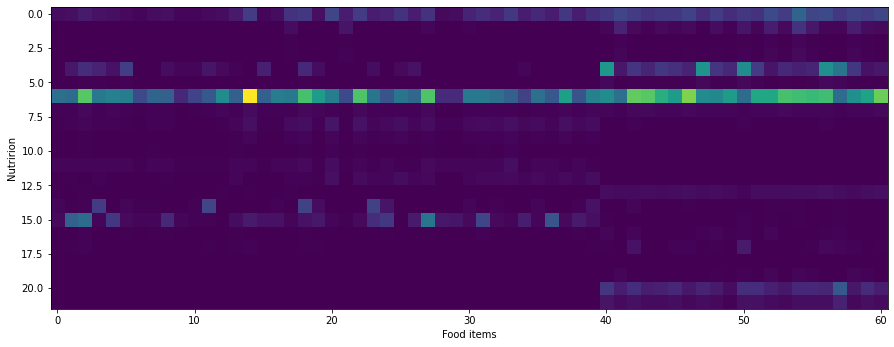

2 random dimensions distribution


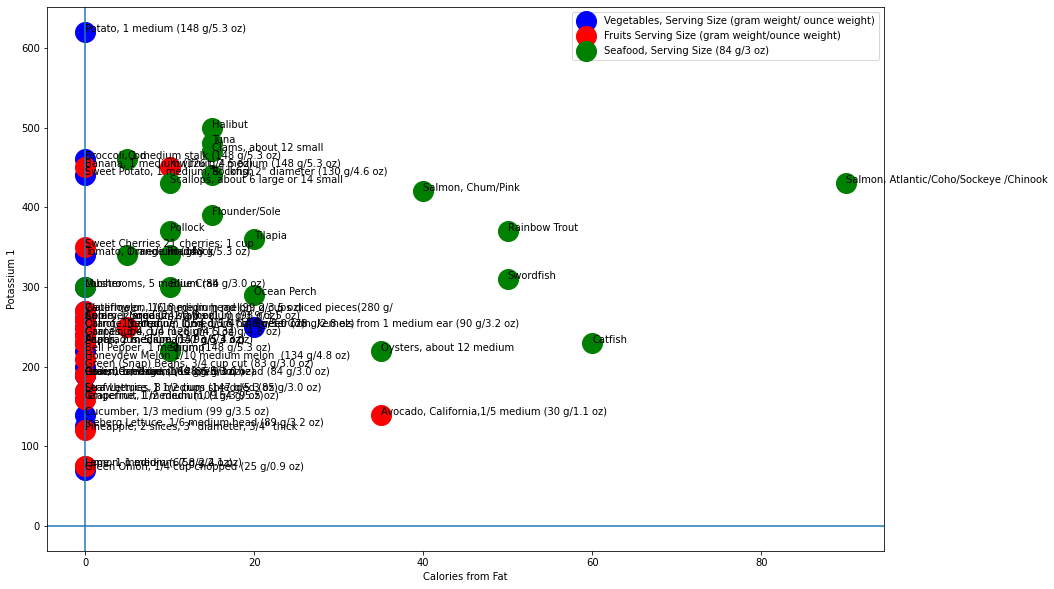

In [ ]:
# A = np.array(dataset.values[1:,1:-1].astype('float64'))
print("Raw matrix values, columns are objects", A.shape)
show_matrix(A.T, "Food items", "Nutririon")

print("2 random dimensions distribution")
show_points_2d(A.T[1], A.T[6], dimensions[1], dimensions[6])

In [ ]:

A.shape

(61, 22)

2 random dimensions distribution centered


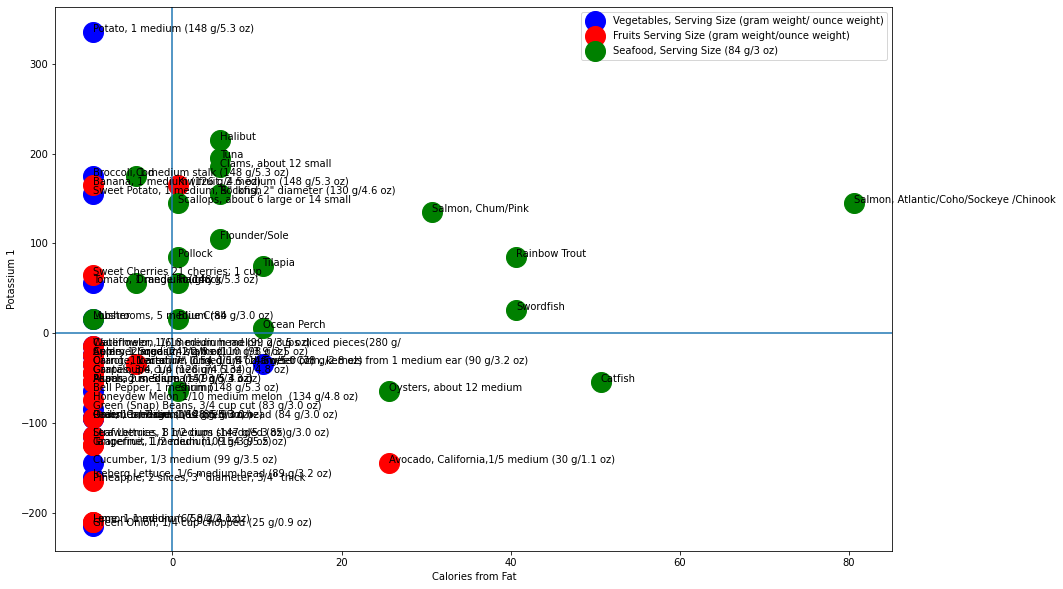

In [ ]:
def centered(A):
    C = A.copy()
    centers = np.mean(A, axis=0)
    C = A.T - centers.reshape((22,1))
    return C.T

Ac = centered(A)

assert np.allclose(np.mean(Ac, axis=0), np.zeros((22, 1))), "After centering, average value of the column should be equal to 0"

print("2 random dimensions distribution centered")
show_points_2d(Ac.T[1], Ac.T[6], dimensions[1], dimensions[6])

In [ ]:
def covariance_matrix(Ac):
  m, n = Ac.shape
  cov = Ac.T @ Ac / (m-1)
  return cov.astype('float64')

In [ ]:
cov = covariance_matrix(Ac)

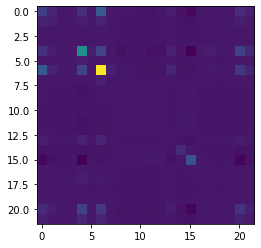

In [ ]:
plt.imshow(cov)

#**Eigen Decomposition**

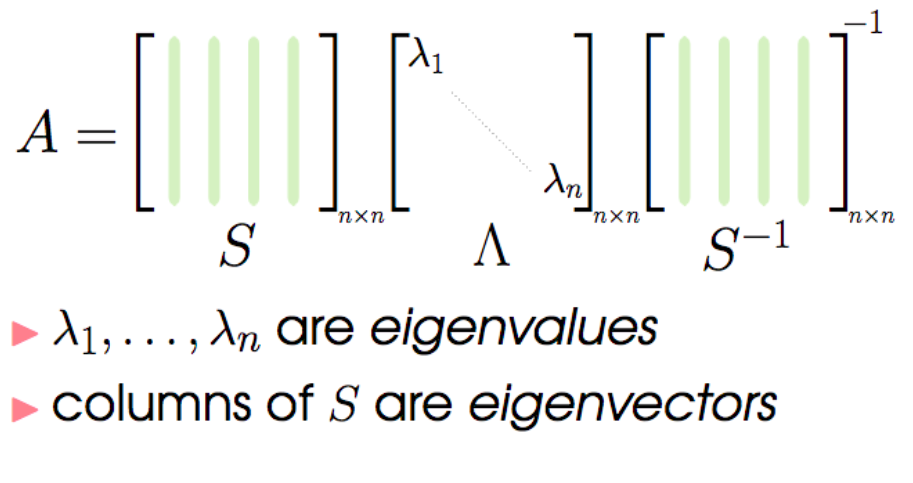

$∃$ iff $\forall \lambda$ its geometric multiplicity equals algebraic multiplicity



#**QR ALGORITHM**

Consider Eigen Decomposition

$$
A = Q T Q^{*}
$$

We can rewrite it the following way

$$
Q T = A Q
$$



We can write down the iterative process

$$
Q_{k+1} R_{k+1}  = A Q_{k}, \: \: \: \: \: \: \: \: Q^{*}_{k+1}  A  =R_{k+1}  Q^{*}_{k}
$$

Introduce

$$
A_k = Q^{*}_{k} A Q_{k} = Q^{*}_{k} Q_{k+1} R_{k+1} = 	\widehat{Q}_{k} R_{k+1}
$$

And the new approximation

$$
A_{k+1} = Q^{*}_{k+1} A Q_{k+1} = (Q^{*}_{k+1}  A  =R_{k+1}) =  R_{k+1} \widehat{Q}_{k}
$$

## SO we can come up with the QR algoritm

1) Set $A_0 = A$


2) Compute QR factorization $A_k = Q_k R_k$




3) Set $A_{k+1} = R_k Q_k $

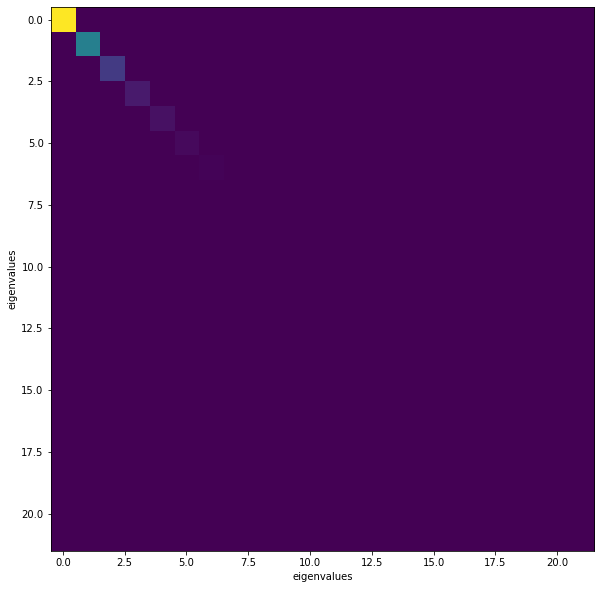

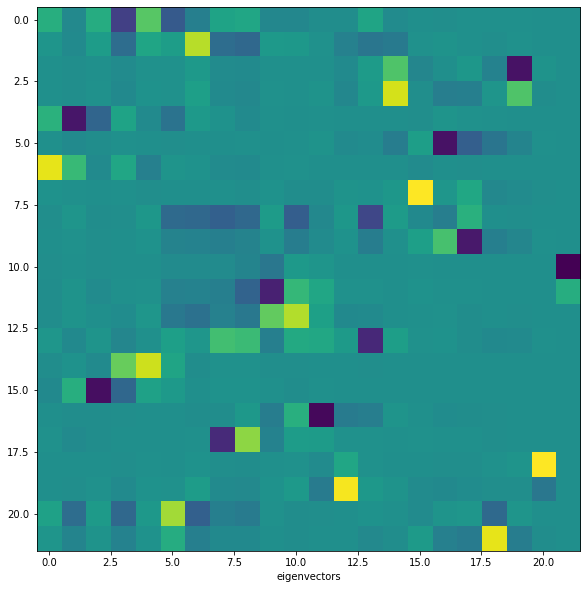

In [ ]:
def QR_algorithm(X, iters=10000):
    A = X.copy()
    PQ = np.eye(A.shape[0])
    # plt.imshow(A)
    # plt.show()
    for i in range(iters):
        Q, R = np.linalg.qr(A)
        A = R.dot(Q)# R @ Q
        # plt.imshow(A)
        # plt.show()
        PQ = PQ.dot(Q) #@ Q
    return np.diag(A), PQ

eigenvalues, eigenvectors = QR_algorithm(cov)
assert np.isclose(np.linalg.norm(eigenvalues[0] * eigenvectors[:, 0] - cov @ eigenvectors[:, 0]), 0),  "This was pretty simple eigenvalues test. And you failed even the test :("

show_matrix(np.diag(eigenvalues), "eigenvalues", "eigenvalues")
show_matrix(eigenvectors, "eigenvectors", "")

##**SORTING**

In [ ]:
inds = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[inds]
eigenvectors = eigenvectors[:, inds]

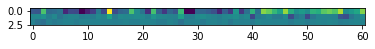

2 first dimensions


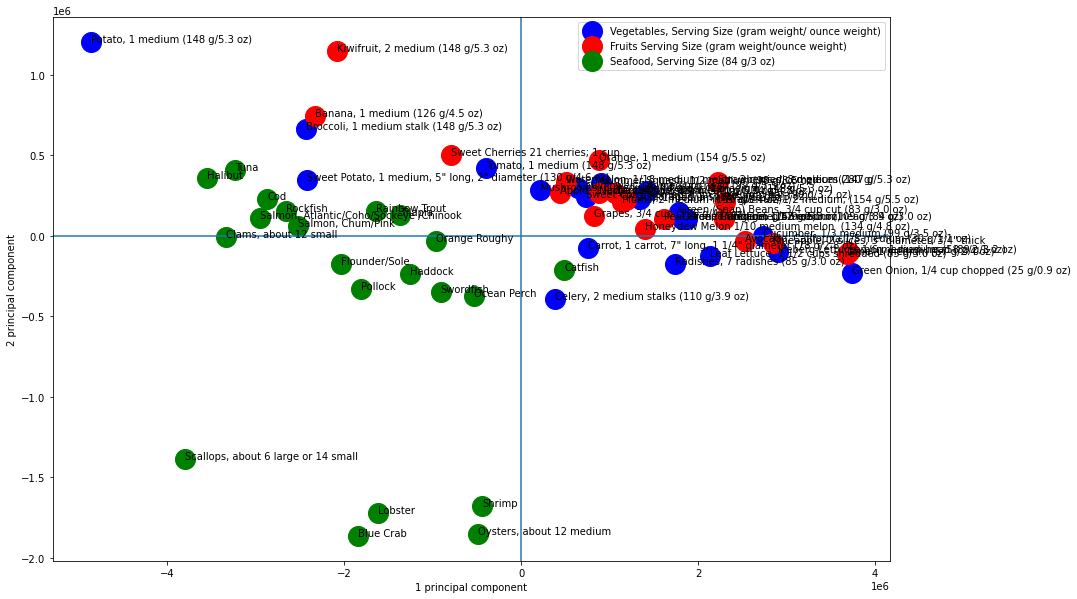

3 first dimensions


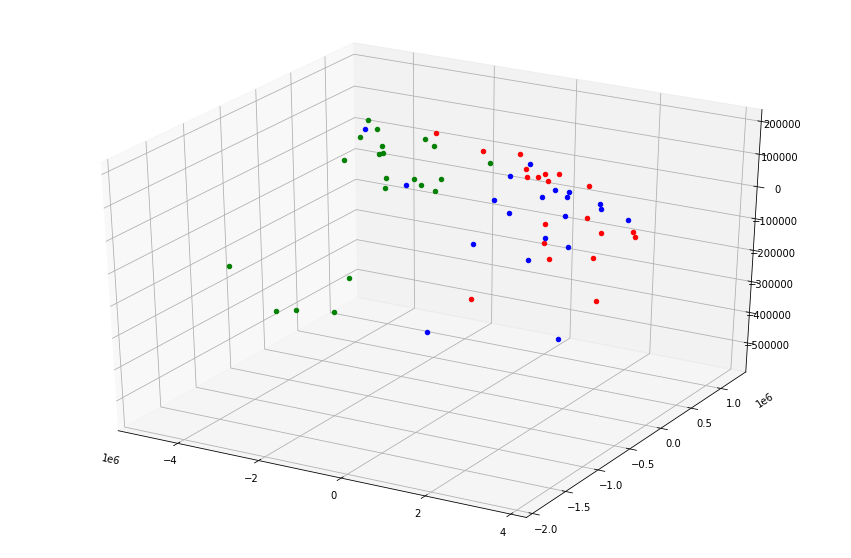

In [ ]:
k = 3

# this matrix has a size (items)x(k) and represent our food items in less-dimensional (k-dimensional) space
# in this new space the smaller the column index, the more valuable the component
W =  eigenvectors[:, :k] @ np.diag(eigenvalues)[:k, :k]
Ak = Ac @ W
plt.imshow(Ak.T)
plt.show()

print("2 first dimensions")
show_points_2d(-Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(-Ak.T[0], Ak.T[1], Ak.T[2])

In [ ]:
def cosine(vec1, vec2):
  nom = vec1 @ vec2
  denom = np.linalg.norm(vec1) * np.linalg.norm(vec2)
  return nom / denom




1859852700242.8047

In [ ]:
def find_k_closest(query, Ak, k=5):
    cosines = np.array([cosine(query, Ak[i, :]) for i in range(Ak.shape[0])])
    sort_indexes = np.argsort(-cosines)
    sort_cosines = np.abs(np.sort(-cosines))
    return sort_indexes[1: k+1], sort_cosines[1: k+1]


recommend_to = 23
inds, cos = find_k_closest(Ak[recommend_to,:], Ak)


print("For:", names[recommend_to])
for k,  p in zip(inds, cos):
    print("\t", names[k], "sim=", p)

For: Cantaloupe, 1/4 medium (134 g/4.8 oz)
	 Strawberries, 8 medium (147 g/5.3 oz) sim= 0.9954494975864177
	 Summer Squash, 1/2 medium (98 g/3.5 oz) sim= 0.9869760039296509
	 Grapefruit, 1/2 medium, (154 g/5.5 oz) sim= 0.9868053280467123
	 Asparagus, 5 spears (93 g/3.3 oz) sim= 0.9861443031577426
	 Bell Pepper, 1 medium (148 g/5.3 oz) sim= 0.9839384009198329


In [ ]:
cov.dtype

dtype('float64')